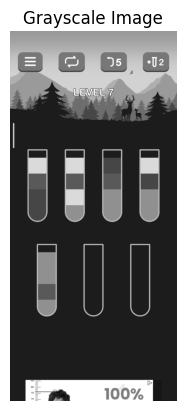

In [112]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('screen.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


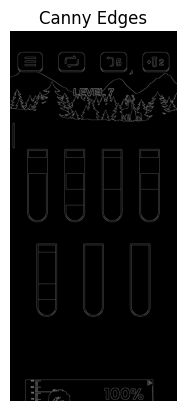

In [113]:
# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Display the Canny edges
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.show()


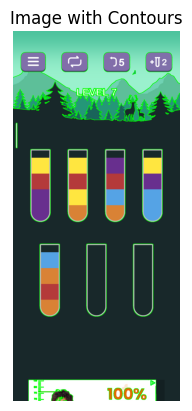

In [114]:
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.axis('off')
plt.show()


Total number of tube 7


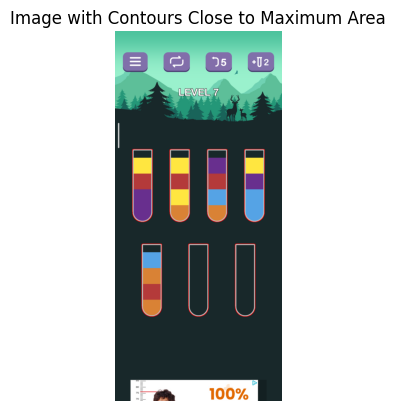

In [115]:
# Sort contours by area
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Get the maximum area contour
max_area_contour = sorted_contours[0]
max_area = cv2.contourArea(max_area_contour)

# Filter contours within ±5% of the maximum area
selected_contours = []
for contour in sorted_contours:
    area = cv2.contourArea(contour)
    if 0.95 * max_area <= area <= 1.05 * max_area:
        selected_contours.append(contour)
print(f"Total number of tube {len(selected_contours)}")


# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, selected_contours, -1, (0, 0, 255), 2)

# Display the image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours Close to Maximum Area')
plt.axis('off')
plt.show()

tubes coodinates [(112, 766), (353, 766), (595, 766), (836, 766), (172, 1380), (474, 1380), (776, 1380)]
following are the color coodinate tube
[[(182, 789), (182, 866), (182, 966), (182, 1066), (182, 1166)], [(423, 789), (423, 866), (423, 966), (423, 1066), (423, 1166)], [(665, 789), (665, 866), (665, 966), (665, 1066), (665, 1166)], [(906, 789), (906, 866), (906, 966), (906, 1066), (906, 1166)], [(242, 1403), (242, 1480), (242, 1580), (242, 1680), (242, 1780)], [(544, 1403), (544, 1480), (544, 1580), (544, 1680), (544, 1780)], [(846, 1403), (846, 1480), (846, 1580), (846, 1680), (846, 1780)]]


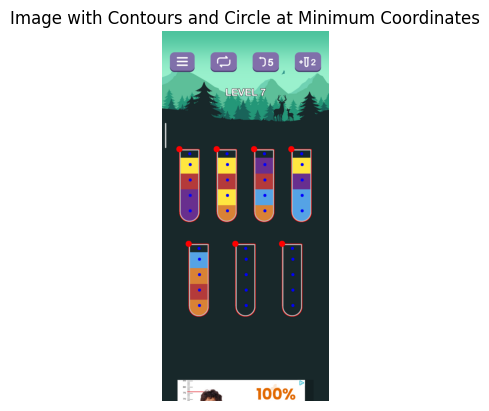

In [116]:
# Find the minimum x and y coordinates of the contours
contour_image_with_circle = contour_image.copy()

for contour in selected_contours:
    min_x = contour[:, :, 0].min()
    min_y = contour[:, :, 1].min()
    cv2.circle(contour_image_with_circle, (min_x, min_y), 20, (0, 0, 255), -1)

# sort on x axis 
tubes_cood = []
def sort_key_x(coord):
    return coord[0]

for contour in selected_contours:
    min_x = contour[:, :, 0].min()
    min_y = contour[:, :, 1].min()
    tubes_cood.append((min_x,min_y))
tubes_cood = sorted(tubes_cood, key=sort_key_x)
# sort tube on y axiz
def sort_key_y(coord):
    return coord[1]
tubes_cood = sorted(tubes_cood, key=sort_key_y)

print(f"tubes coodinates {tubes_cood}")

# get the coodinate fo colors in tube make circle around it and also store it in new list 
tubes_color=[]
for tube in tubes_cood:
    tube_color_coodinates = []

    # append upper most empty coodinate to check if tube is empty 
    tube_color_coodinates.append((tube[0]+70 , tube[1]+23))
    cv2.circle(contour_image_with_circle, (tube[0]+67,tube[1]+30 ), 10, (255, 0, 0), -1)

    for i in range(1,5):
        color_cood_x = tube[0] + 70
        color_cood_y = tube[1] + 100 * i

        # store coodinate for fetching its color 
        tube_color_coodinates.append((color_cood_x,color_cood_y))
        # Draw a circle at the minimum coordinates
        cv2.circle(contour_image_with_circle, (color_cood_x, color_cood_y), 10, (255, 0, 0), -1)
    tubes_color.append(tube_color_coodinates)

print("following are the color coodinate tube")
print(tubes_color)

# Display the image with contours and circle
plt.imshow(cv2.cvtColor(contour_image_with_circle, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours and Circle at Minimum Coordinates')
plt.axis('off')
plt.show()


In [117]:

#print("following are the color coodinate of tube")
#print(tubes_color)
'''
for i in range(len(tubes_color)) :
    print(f"\nTube {i}"  )
    for color_coodinates in tubes_color[i]:
         print("Cood",color_coodinates , end=" ")
         print()
'''

tubes_water_color =[]
for i in range(len(tubes_color)) :
    tube_water_color = []
    for color_cood in tubes_color[i]:
        tube_water_color.append(tuple(image[color_cood[1],color_cood[0]])) # store the color of tube water
    tubes_water_color.append(tube_water_color)



print("color of water in tubes")
for tube in tubes_water_color :
    print(tube)


color of water in tubes
[(42, 40, 24), (64, 230, 255), (58, 58, 180), (142, 47, 104), (142, 47, 104)]
[(42, 40, 24), (64, 230, 255), (58, 58, 180), (64, 230, 255), (53, 130, 217)]
[(42, 40, 24), (142, 47, 104), (58, 58, 180), (229, 163, 85), (53, 130, 217)]
[(42, 40, 24), (64, 230, 255), (142, 47, 104), (229, 163, 85), (229, 163, 85)]
[(42, 40, 24), (229, 163, 85), (53, 130, 217), (58, 58, 180), (53, 130, 217)]
[(42, 40, 24), (42, 40, 24), (42, 40, 24), (42, 40, 24), (42, 40, 24)]
[(42, 40, 24), (42, 40, 24), (42, 40, 24), (42, 40, 24), (42, 40, 24)]


In [118]:
# Convert the colors in tubes_water_color to alphabets

for i in range(len(tubes_water_color[0])):
    print()
    for j  in range(len(tubes_water_color)):
        print(f"\033[38;2;{tubes_water_color[j][i][2]};{tubes_water_color[j][i][1]};{tubes_water_color[j][i][0]}m\033[0m" , end="  ") # open cv uses GBR not RGB so map color acordenly
        

for tube_colors in tubes_water_color:
    for color in tube_colors:
        #print(f"\033[38;2;{color[2]};{color[1]};{color[0]}m\033[0m") # open cv uses GBR not RGB so map color acordenly
        pass



              
              
              
              
              

Now convert the given rgb to some char which need not to represent color

In [119]:
# get unique colors in the tubes
unique_color = set()
for tube_colors in tubes_water_color:
    unique_color = unique_color.union(set(tube_colors))

for color in unique_color:
    print(f"\033[38;2;{color[2]};{color[1]};{color[0]}m\033[0m {color}" ) 

#Give colors a identifyer

color_matrix = [] 

for tube_color in tubes_water_color:
    tube = []
    for color in tube_color:
        for index , color_ in enumerate(unique_color):
            if color ==  color_ :
                tube.append(index)
    color_matrix.append(tube)

print("\nColor matrix")
for i in range(len(color_matrix[0])):
    for j in range(len(color_matrix)):
        print(color_matrix[j][i],end=" ")
    print()

 (229, 163, 85)
 (142, 47, 104)
 (64, 230, 255)
 (53, 130, 217)
 (42, 40, 24)
 (58, 58, 180)

Color matrix
4 4 4 4 4 4 4 
2 2 1 2 0 4 4 
5 5 5 1 3 4 4 
1 2 0 0 5 4 4 
1 3 3 0 3 4 4 


In [122]:
tube_info=[]
tube_matrix=[]

for i in range(len(color_matrix)):
    if color_matrix[i][0] == color_matrix[i][-1]: # if first and last color are same (first color is always of empty tube)
        tube_matrix.append([]) # append empty tube
    else:
        tube = []
        for j in range(1,len(color_matrix[0])):
            if color_matrix[i][j] != color_matrix[i][0]: # if color is not of empty type
            tube.append(color_matrix[i][j])
        tube_matrix.append(tube)

print(tube_matrix)



[[2, 5, 1, 1], [2, 5, 2, 3], [1, 5, 0, 3], [2, 1, 0, 0], [0, 3, 5, 3], [], []]
